## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4            Y
0  85.686909  1209.541419  0.753749  1.685428   915.547302
1  63.525767  1146.992794  0.583816  3.247476   672.838248
2  11.205960   668.434410  0.659840  2.805484   441.205005
3   8.050504  1727.185547  0.940388  2.418033  1624.095593
4  20.064703  1104.148227  0.015953  5.534728    26.621273


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9648161	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9536645	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9427390	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9326687	total: 59ms	remaining: 14.7s
4:	learn: 0.9201950	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9099265	total: 60ms	remaining: 9.95s
6:	learn: 0.8976056	total: 60.8ms	remaining: 8.62s
7:	learn: 0.8855396	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8742188	total: 61.6ms	remaining: 6.78s
9:	learn: 0.8631665	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8541877	total: 62.6ms	remaining: 5.63s
11:	learn: 0.8427378	total: 63.1ms	remaining: 5.19s
12:	learn: 0.8308918	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8197406	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8103167	total: 64.2ms	remaining: 4.21s
15:	learn: 0.8007844	total: 64.6ms	remaining: 3.97s
16:	learn: 0.7899819	total: 65ms	remaining: 3.76s
17:	learn: 0.7804382	total: 65.4ms	remaining: 3.57s
18:	learn: 0.7731395	total: 65.8ms	remaining: 3.4s


130:	learn: 0.2148863	total: 115ms	remaining: 761ms
131:	learn: 0.2129264	total: 115ms	remaining: 758ms
132:	learn: 0.2107906	total: 116ms	remaining: 755ms
133:	learn: 0.2083569	total: 116ms	remaining: 751ms
134:	learn: 0.2066174	total: 117ms	remaining: 747ms
135:	learn: 0.2047071	total: 117ms	remaining: 743ms
136:	learn: 0.2025330	total: 117ms	remaining: 739ms
137:	learn: 0.2010343	total: 118ms	remaining: 737ms
138:	learn: 0.1990323	total: 118ms	remaining: 734ms
139:	learn: 0.1972819	total: 119ms	remaining: 730ms
140:	learn: 0.1955262	total: 119ms	remaining: 727ms
141:	learn: 0.1929601	total: 120ms	remaining: 724ms
142:	learn: 0.1911556	total: 120ms	remaining: 720ms
143:	learn: 0.1890918	total: 120ms	remaining: 716ms
144:	learn: 0.1870571	total: 121ms	remaining: 712ms
145:	learn: 0.1844367	total: 121ms	remaining: 709ms
146:	learn: 0.1824883	total: 122ms	remaining: 706ms
147:	learn: 0.1805990	total: 122ms	remaining: 703ms
148:	learn: 0.1787464	total: 122ms	remaining: 699ms
149:	learn: 

288:	learn: 0.0573704	total: 183ms	remaining: 451ms
289:	learn: 0.0570122	total: 184ms	remaining: 450ms
290:	learn: 0.0567016	total: 184ms	remaining: 449ms
291:	learn: 0.0563550	total: 185ms	remaining: 448ms
292:	learn: 0.0558840	total: 185ms	remaining: 447ms
293:	learn: 0.0555531	total: 185ms	remaining: 445ms
294:	learn: 0.0551887	total: 186ms	remaining: 445ms
295:	learn: 0.0549062	total: 187ms	remaining: 444ms
296:	learn: 0.0546104	total: 187ms	remaining: 443ms
297:	learn: 0.0543300	total: 188ms	remaining: 442ms
298:	learn: 0.0540573	total: 188ms	remaining: 441ms
299:	learn: 0.0536869	total: 188ms	remaining: 440ms
300:	learn: 0.0535021	total: 189ms	remaining: 439ms
301:	learn: 0.0530449	total: 189ms	remaining: 438ms
302:	learn: 0.0528420	total: 190ms	remaining: 437ms
303:	learn: 0.0524212	total: 190ms	remaining: 435ms
304:	learn: 0.0521511	total: 191ms	remaining: 434ms
305:	learn: 0.0518296	total: 191ms	remaining: 433ms
306:	learn: 0.0514002	total: 192ms	remaining: 432ms
307:	learn: 

544:	learn: 0.0196824	total: 297ms	remaining: 248ms
545:	learn: 0.0195947	total: 297ms	remaining: 247ms
546:	learn: 0.0195455	total: 298ms	remaining: 247ms
547:	learn: 0.0194718	total: 298ms	remaining: 246ms
548:	learn: 0.0194234	total: 299ms	remaining: 246ms
549:	learn: 0.0193382	total: 300ms	remaining: 245ms
550:	learn: 0.0193133	total: 300ms	remaining: 244ms
551:	learn: 0.0192206	total: 301ms	remaining: 244ms
552:	learn: 0.0191766	total: 301ms	remaining: 243ms
553:	learn: 0.0191561	total: 302ms	remaining: 243ms
554:	learn: 0.0190924	total: 302ms	remaining: 242ms
555:	learn: 0.0190722	total: 302ms	remaining: 241ms
556:	learn: 0.0189904	total: 303ms	remaining: 241ms
557:	learn: 0.0189652	total: 303ms	remaining: 240ms
558:	learn: 0.0188877	total: 304ms	remaining: 239ms
559:	learn: 0.0188630	total: 304ms	remaining: 239ms
560:	learn: 0.0187829	total: 305ms	remaining: 238ms
561:	learn: 0.0187585	total: 305ms	remaining: 238ms
562:	learn: 0.0186795	total: 305ms	remaining: 237ms
563:	learn: 

698:	learn: 0.0142101	total: 365ms	remaining: 157ms
699:	learn: 0.0142008	total: 366ms	remaining: 157ms
700:	learn: 0.0141917	total: 366ms	remaining: 156ms
701:	learn: 0.0141661	total: 367ms	remaining: 156ms
702:	learn: 0.0141481	total: 367ms	remaining: 155ms
703:	learn: 0.0141407	total: 367ms	remaining: 154ms
704:	learn: 0.0140948	total: 368ms	remaining: 154ms
705:	learn: 0.0140860	total: 368ms	remaining: 153ms
706:	learn: 0.0140433	total: 368ms	remaining: 153ms
707:	learn: 0.0140190	total: 369ms	remaining: 152ms
708:	learn: 0.0139582	total: 369ms	remaining: 152ms
709:	learn: 0.0139520	total: 370ms	remaining: 151ms
710:	learn: 0.0139350	total: 370ms	remaining: 151ms
711:	learn: 0.0139290	total: 371ms	remaining: 150ms
712:	learn: 0.0138875	total: 371ms	remaining: 149ms
713:	learn: 0.0138430	total: 372ms	remaining: 149ms
714:	learn: 0.0138266	total: 372ms	remaining: 148ms
715:	learn: 0.0138207	total: 373ms	remaining: 148ms
716:	learn: 0.0137804	total: 373ms	remaining: 147ms
717:	learn: 

961:	learn: 0.0076756	total: 479ms	remaining: 18.9ms
962:	learn: 0.0076585	total: 480ms	remaining: 18.4ms
963:	learn: 0.0076480	total: 480ms	remaining: 17.9ms
964:	learn: 0.0076449	total: 481ms	remaining: 17.4ms
965:	learn: 0.0076280	total: 481ms	remaining: 16.9ms
966:	learn: 0.0076249	total: 482ms	remaining: 16.4ms
967:	learn: 0.0075927	total: 482ms	remaining: 15.9ms
968:	learn: 0.0075824	total: 482ms	remaining: 15.4ms
969:	learn: 0.0075775	total: 483ms	remaining: 14.9ms
970:	learn: 0.0075745	total: 484ms	remaining: 14.4ms
971:	learn: 0.0075716	total: 484ms	remaining: 13.9ms
972:	learn: 0.0075614	total: 484ms	remaining: 13.4ms
973:	learn: 0.0075585	total: 485ms	remaining: 12.9ms
974:	learn: 0.0075418	total: 485ms	remaining: 12.4ms
975:	learn: 0.0075372	total: 486ms	remaining: 12ms
976:	learn: 0.0075271	total: 487ms	remaining: 11.5ms
977:	learn: 0.0075105	total: 487ms	remaining: 11ms
978:	learn: 0.0074940	total: 488ms	remaining: 10.5ms
979:	learn: 0.0074777	total: 489ms	remaining: 9.97

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


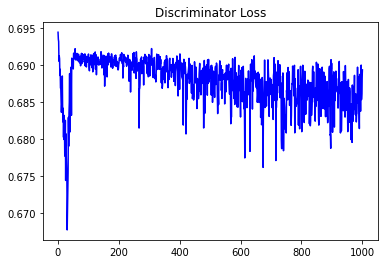

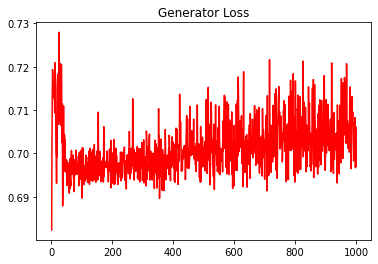

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008861457737253352


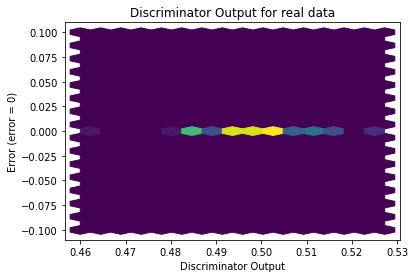

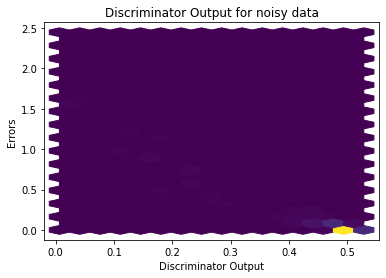

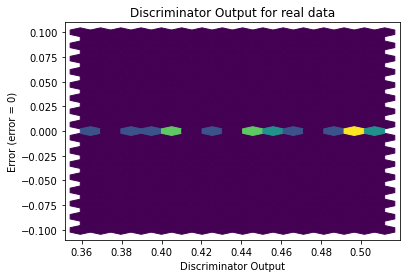

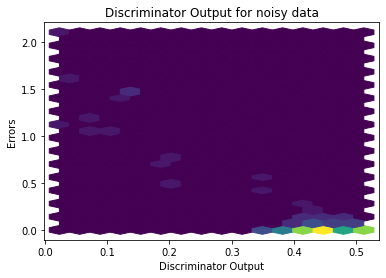

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1856]], requires_grad=True)
